# NUSA FA 25 Assessment

## Instructions

1. **Dataset Selection**  
   - Identify a dataset containing **historical prices** for:  
     - A **single stock** of your choice.  
     - The **S&P 500 Index** over the same time period.  
   - The dataset **does not need** to include the most recent prices.  
   - Acceptable data sources include:  
     - [Kaggle Datasets](https://www.kaggle.com/datasets)  
     - [Yahoo Finance API](https://github.com/ranaroussi/yfinance)

2. **Tools & Libraries**  
   - Required:  
     - `pandas`  
     - `numpy`  
     - `matplotlib` (or another plotting library of your choice)  
   - Optional:  
     - `statsmodels`  
     - `scipy`  
     - `sklearn`  

3. **Submission Requirements**  
   - Provide **code** with **comments** and/or **markdown cells** that clearly explain your thought process.  
   - Ensure **clarity**, **correctness**, and **clean code** — design your analysis thoughtfully.  

4. **Interview Expectation**  
   - If selected for an interview, you should be prepared to:  
     - Explain your thought process.  
     - Describe the steps you took to analyze the data.  
     - Use of AI is prohibited on this assesment
     - Any code submitted may be reviewed, and candidates will be expected to explain their implementation choices during the interview
    
If you have any questions, please don't hesitate to [reach out](https://www.nusystematicalpha.com/team.html) to any of the leaders.

### Personal Details
##### Name: Duke Diamond
##### Date: 8/27/25
##### Year of Study (e.g. Sophomore): Sophomore
##### Major/Minor: Computer Science, AI Concentration, Minor in Economics
##### Email (that you check often): dukeishosw@gmail.com
##### Phone Number: 860-964-8545
##### GitHub or Personal Website: dukemdiamond.com | https://github.com/dukemdiamond


### Section 1 Data Loading and Cleaning
- Q1: Load in the datasets and parse the data in a way that makes sense for the analysis.
- Q2: Print the summary statistics of each dataset, and the total/annualized return.
- Q3: Plot the cumulative returns for the stock and for the S&P 500 index. Comment briefly on results overtime.

S&P 500 1Y Summary Statistics
Price    Open   Close  Cumulative_Return
count  251.00  251.00             251.00
mean  5903.34 5905.02               4.96
std    289.30  288.70               5.13
min   4953.79 4982.77             -11.43
25%   5718.61 5710.87               1.51
50%   5920.67 5929.04               5.39
75%   6062.50 6067.07               7.84
max   6477.38 6481.40              15.21
Total Return: 15.21%

REGN 1Y Summary Statistics
Price    Open   Close  Cumulative_Return
count  251.00  251.00             251.00
mean   715.74  713.90             -40.34
std    187.90  185.56              15.51
min    484.80  482.34             -59.69
25%    567.82  569.50             -52.41
50%    677.64  678.58             -43.29
75%    760.33  758.92             -36.58
max   1199.58 1196.63               0.00
Total Return: -50.95%


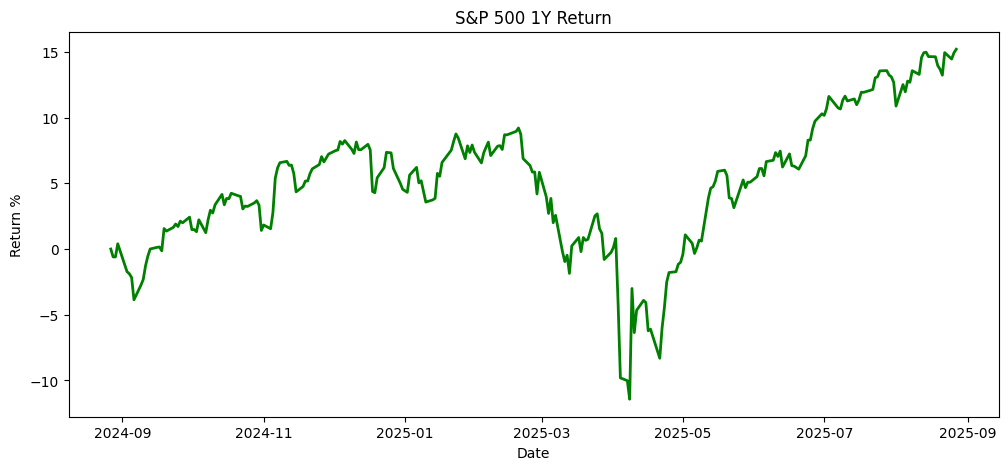

The S&P 500 continues to generate alpha, garnering over 15% returns in the last year. As the market bottomed out, so did the S&P 500 - near -13% during April. Markets are currently at all-time highs, with recent gains hopeful of a rate-cut in September.


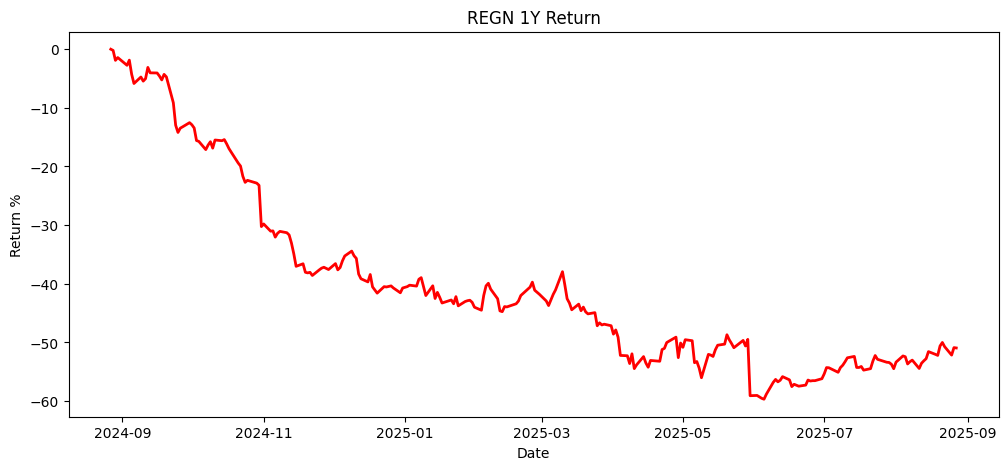

REGN has had a rough year - down nearly 51% over the last 1Y, attributed to patent cliffs, poor financials, and increased competition in the biotech/drug space. 


In [101]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# Used to ignore all yFinance 'future update' warnings, etc.
import warnings

warnings.filterwarnings('ignore')

# Set global format to 2 Decimals
pd.options.display.float_format = '{:.2f}'.format

# I'm going to be using REGN as my stock.

# Defining time period (1Y)
start_date = '2024-08-27'
end_date = '2025-08-28'

# Downloading S&P 500 & REGN Open/Close data, using progress=False to ignore loading
market = yf.download('^GSPC', start=start_date, end=end_date, progress=False)[['Open', 'Close']]
regn = yf.download('REGN', start=start_date, end=end_date, progress=False)[['Open', 'Close']]

# Must flatten multi-lev-columns
market = market.droplevel(1, axis=1)
regn = regn.droplevel(1, axis=1)

# Calculate cumulative returns
market['Cumulative_Return'] = (market['Close'] / market['Close'].iloc[0] - 1) * 100
regn['Cumulative_Return'] = (regn['Close'] / regn['Close'].iloc[0] - 1) * 100

# Q2: Market Summary Statistics
print('S&P 500 1Y Summary Statistics')
print(market.describe())
print(f'Total Return: {market['Cumulative_Return'].iloc[-1]:.2f}%')

# REGN Summary Statistics
print('\nREGN 1Y Summary Statistics')
print(regn.describe())
print(f'Total Return: {regn['Cumulative_Return'].iloc[-1]:.2f}%')

# Q3: Market Plot
plt.figure(figsize=(12, 5))
plt.plot(market['Cumulative_Return'], label='S&P 500', color='green', linewidth=2)
plt.title('S&P 500 1Y Return')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.show()

# Comments
print('The S&P 500 continues to generate alpha, garnering over 15% returns in the last year. As the market bottomed out, so did the S&P 500 - near -13% during April. Markets are currently at all-time highs, with recent gains hopeful of a rate-cut in September.')


# REGN Plot
plt.figure(figsize=(12, 5))
plt.plot(regn['Cumulative_Return'], label='REGN', color='red', linewidth=2)
plt.title('REGN 1Y Return')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.show()

# Comments
print('REGN has had a rough year - down nearly 51% over the last 1Y, attributed to patent cliffs, poor financials, and increased competition in the biotech/drug space. ')


### Section 2 Return Analysis and Correlation

- Q4: Calculate the daily excess return of the stock (stock return vs S&P 500 return). Did the stock outperform the index? Plot the excess return over time.
- Q5: Calculate the correlation between the stock and the S&P 500 index. What does this tell you about the relationship between the two?

Average Daily Excess Return: -0.22
Since REGN had an average daily excess return of -0.22, this means that on average, REGN performed -22% worse than the market daily. Therefore, it did not outperform.


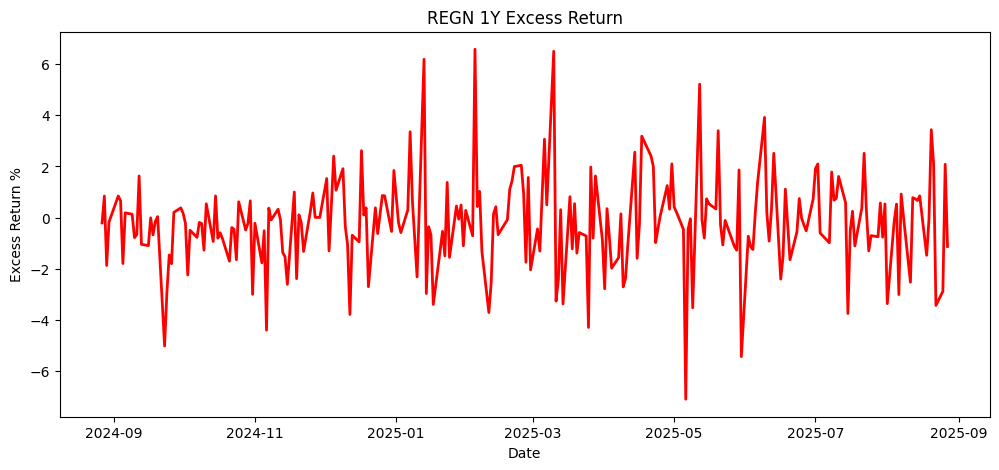

Correlation: 0.43
Since the correlation is 0.43, this suggests a moderate correlation between REGN and the index. This means that when the index goes up, REGN can also go up, but not always, or not always the same amount. This is because it's only moderately correlated. 43% of REGN's returns can be attributed to the index. This is more important in a beta context as it shows REGN may have a low beta (0-1), with a variance of .185 (.43)^2, showing it's not as volatile


In [112]:
# Q4: Add Daily Return %
market['Daily_Return'] = ((market['Close'] / market['Open'] - 1) * 100)
regn['Daily_Return'] = ((regn['Close'] / regn['Open'] - 1) * 100)

# Add Daily 'Excess' Return
regn['Daily_Excess_Return'] = (regn['Daily_Return'] - market['Daily_Return'])
print(f"Average Daily Excess Return: {regn['Daily_Excess_Return'].mean():.2f}")
print("Since REGN had an average daily excess return of -0.22, this means that on average, REGN performed -22% worse than the market daily. Therefore, it did not outperform.")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(regn['Daily_Excess_Return'], label='REGN', color='red', linewidth=2)
plt.title('REGN 1Y Excess Return')
plt.xlabel('Date')
plt.ylabel('Excess Return %')
plt.show()

# Q5: Correlation
correlation = regn['Daily_Return'].corr(market['Daily_Return'])
print(f"Correlation: {correlation:.2f}")
print("Since the correlation is 0.43, this suggests a moderate correlation between REGN and the index. This means that when the index goes up, REGN can also go up, but not always, or not always the same amount. This is because it's only moderately correlated. 43% of REGN's returns can be attributed to the index. This is more important in a beta context as it shows REGN may have a low beta (0-1), with a variance of .185 (.43)^2, showing it's not as volatile")



### Section 3 Linear Regression

##### Q6: Perform a linear regression analysis to determine the relationship between the stock and the S&P 500 index.
##### Q7: Report the regression coefficients (slope and intercept) and the slope in financial terms.
##### Q8: What is the R-squared value of the regression? What does this tell you about the relationship between the two?
##### Q9: Plot the regression line on the scatter plot of the stock returns vs. S&P 500 index returns.
  - Label the axes and title the plot.
  - Display the regression line
  - Include a brief comment on whether the plot supports the regression analysis.

In [116]:
# Q6 Linear Regression
linear_regression = linregress(market['Daily_Return'], regn['Daily_Return'])
lreg_df = pd.DataFrame({
    'Slope': [linear_regression.slope],
    'Intercept': [linear_regression.intercept],
    'R-Value': [linear_regression.rvalue],
    'P-Value': [linear_regression.pvalue],
    'Std-Err': [linear_regression.stderr],
    'Intercept Std-Err': [linear_regression.intercept_stderr]
})
lreg_df

,Slope,Intercept,R-Value,P-Value,Std-Err,Intercept Std-Err
0,0.84,-0.21,0.43,0.00,0.11,0.11


Slope: 0.84
Intercept: -0.21

The slope in this case, 0.84, represents REGNs beta. This is the volatility of the equity against the index. Since it is < 1, this means that there is lower volatility / risk regarding REGN compared to the S&P 500 (with a benchmark beta of 1)

The intercept, -0.21, is the average daily excess return. This means, on average, REGN underperforms the index by -0.21% each day. So, if the S&P 500 were to rise 1% one day, REGN would rise 0.84%, then -0.21% in excess, resulting in a 

R-squared value of the regression: 0.186
Since the r-squared value of the regression is 0.186, this tells us that 18.6% of REGN's variance can be attributed to the S&P 500. So, if REGN moves 10%, 18.6% of that movement can be explained by the market, the rest (83.4%) attributed to other factors or within Regeneron. This is a relatively low r-squared value, telling us that the S&P 500 is weaker in explaining REGN's movements.


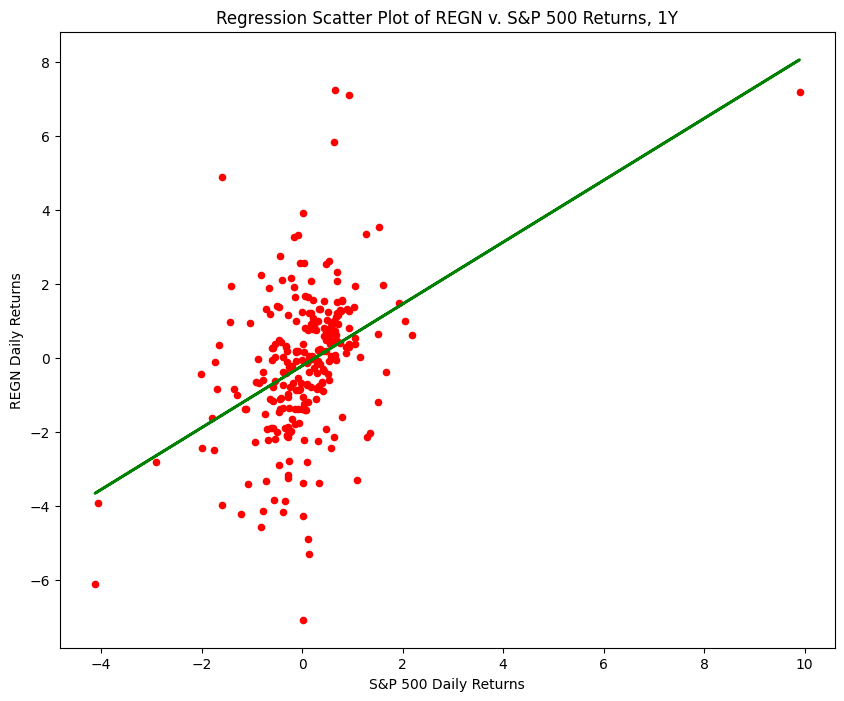

In [156]:
# Q7 cSlope & Intercept in Financial Terms
print(f"Slope: {linear_regression.slope:.2f}")
print(f"Intercept: {linear_regression.intercept:.2f}")
print('\nThe slope in this case, 0.84, represents REGNs beta. This is the volatility of the equity against the index. Since it is < 1, this means that there is lower volatility / risk regarding REGN compared to the S&P 500 (with a benchmark beta of 1)')
print('\nThe intercept, -0.21, is the average daily excess return. This means, on average, REGN underperforms the index by -0.21% each day. So, if the S&P 500 were to rise 1% one day, REGN would rise 0.84%, then -0.21% in excess, resulting in a ')

# Ensuring correctness w/ manual linear regression
mean_market = market['Daily_Return'].mean()
mean_regn = regn['Daily_Return'].mean()

# Beta calculation: Covariance of REGN & Market divided by Variance of Market
numerator = sum((regn['Daily_Return'] - mean_regn) * (market['Daily_Return'] - mean_market))
denominator = sum(np.square(market['Daily_Return'] - mean_market))
slope = numerator / denominator

intercept = mean_regn - (slope * mean_market)
# Checks out -> Intercept: -.21 | Slope: 0.84

# Q8: R-squared value
r_squared = np.square(linear_regression.rvalue)
print(f"\nR-squared value of the regression: {r_squared:.3f}")
print(f"Since the r-squared value of the regression is {r_squared:.3f}, this tells us that 18.6% of REGN's variance can be attributed to the S&P 500. So, if REGN moves 10%, 18.6% of that movement can be explained by the market, the rest (83.4%) attributed to other factors or within Regeneron. This is a relatively low r-squared value, telling us that the S&P 500 is weaker in explaining REGN's movements.")

# Q9: Plot
plt.figure(figsize=(10, 8))
plt.scatter(market['Daily_Return'], regn['Daily_Return'], s=20, c='red')
plt.title('Regression Scatter Plot of REGN v. S&P 500 Returns, 1Y')
plt.xlabel('S&P 500 Daily Returns')
plt.ylabel('REGN Daily Returns')

# Regression line
x = market['Daily_Return']
y = slope * x + intercept
plt.plot(x, y, color='green', linewidth=2)
plt.show()


## The scatter plot & regression line support the analysis:
- Beta: it supports beta (0.84) as it's less steep than a beta of 1 would be
- Moderately correlated: there's a lot of scatter around the line which supports our r-squared of 0.186
- Intercept: Slightly below 0 (-0.21) supporting the negative alpha we analyzed
